In [6]:
# Import Tensorflow 2.0

# %tensorflow_version 2.x
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import data_loader.util as util
import data_loader.loader as data_loader
import model_loader.model as m_loader
import model_loader.configure as model_config
# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
# assert len(tf.config.list_physical_devices('GPU')) > 0

In [7]:
#Downloading data from tf keras dataset
mnist_data = tf.keras.datasets.mnist.load_data()
_, (test_images, test_labels)= mnist_data
print(test_images.shape,test_labels.shape)

(10000, 28, 28) (10000,)


In [8]:
#Data processing for model feeding
test_images = (np.expand_dims(test_images,axis = -1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.float64)
print(test_images.shape,test_labels.shape)

(10000, 28, 28, 1) (10000,)


In [9]:
checkpoint_path="training_1/Epoch_28_train_loss_0.0014007522258907557_Val_loss0.0462334044277668.hdf5"

In [10]:
new_model = tf.keras.models.load_model(checkpoint_path)

In [11]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 900)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               115328    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [12]:
#performance calculation for all test data
test_loss, test_acc = new_model.evaluate(test_images, test_labels)
print('Test loss{}, accuracy {}'.format(test_loss,test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.9930
Test loss0.04623338207602501, accuracy 0.9929999709129333


In [14]:
#prediction of all the data
predictions = new_model.predict(test_images)

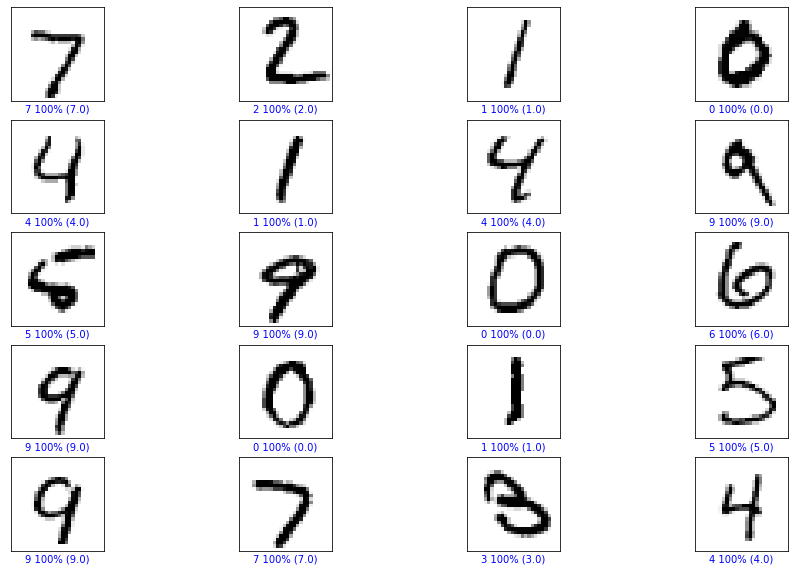

In [16]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  data_loader.plot_image_prediction(i, predictions, test_labels, test_images)

Ground label 8
Predicted label 8


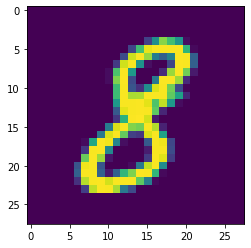

In [23]:
#Single image prediction
img = test_images[110]
label = int(test_labels[110])
plt.imshow(img)
img = (np.expand_dims(img,0))
predictions = new_model.predict(img)
prediction = np.argmax(predictions)
print('Ground label {}\nPredicted label {}'.format(label,prediction))